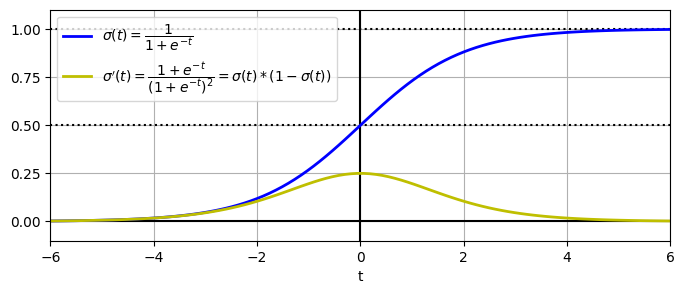

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))
sig_half = 1 / (1 + np.exp(-t/2))
sig_double = 1 / (1 + np.exp(-t*2))
sig_prime = np.exp(-t)/np.square(1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [.5, .5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
#plt.plot(t, sig_half, "g-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t / 2}}$")
#plt.plot(t, sig_double, "r-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-2t}}$")
plt.plot(t, sig_prime, "y-", linewidth=2, label=r"$\sigma'(t) = \dfrac{1 + e^{-t}}{(1 + e^{-t})^2} = \sigma(t)*(1 - \sigma(t))$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

0.6939890710382514

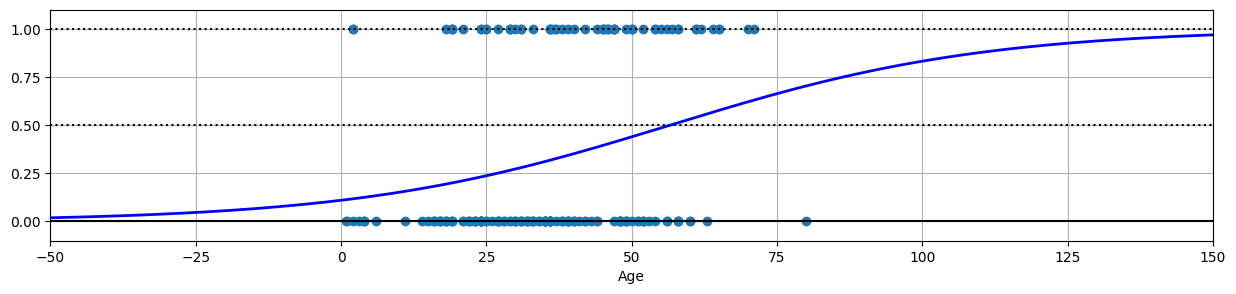

In [10]:
titanic = pd.read_csv('Titanic.csv').dropna()

#titanic = titanic.query("Pclass==2")
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=504)
X = np.array(titanic["Age"]).reshape(-1, 1)
y = 1-titanic["Survived"]
log_reg.fit(X, y)


start, end = -50, 150
t = np.linspace(start, end, end)
coef, intercept = log_reg.coef_[0, 0], log_reg.intercept_[0]
sig = 1 / (1 + np.exp(-coef*t - intercept))

plt.figure(figsize=(15, 3))
plt.plot(titanic["Age"], y, 'o')
plt.plot([start, end], [0, 0], "k-")
plt.plot([start, end], [0.5, 0.5], "k:")
plt.plot([start, end], [1, 1], "k:")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("Age")
plt.axis([start, end, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()


log_reg.score(X, y)


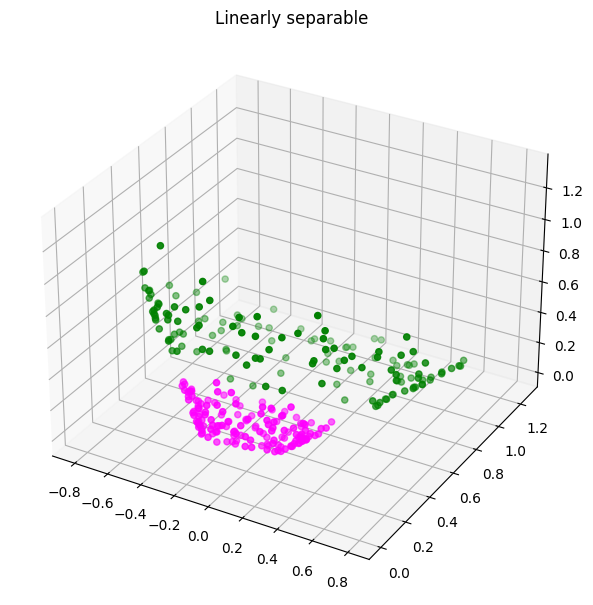

In [14]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap
from math import exp, exp2
colors = ListedColormap(['green', 'magenta'])

X_circles, y_circles = make_circles(n_samples=300, factor=.65, noise = .07)

X3 = np.array([x1**2 + x2**2 for x1, x2 in X_circles])

X3D = np.array([(x1**2, x2**2, 1.4 * x1 * x2) for x1, x2 in X_circles])

figure = plt.figure(figsize=(16, 8))

ax = figure.add_subplot(1, 2, 1, title='Not linearly separable')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=colors)

ax = figure.add_subplot(1, 2, 2, title='Linearly separable', projection='3d')
ax.scatter(X3D[:, 2], X3D[:, 0], X3D[:, 1],  c=y_circles, cmap=colors)


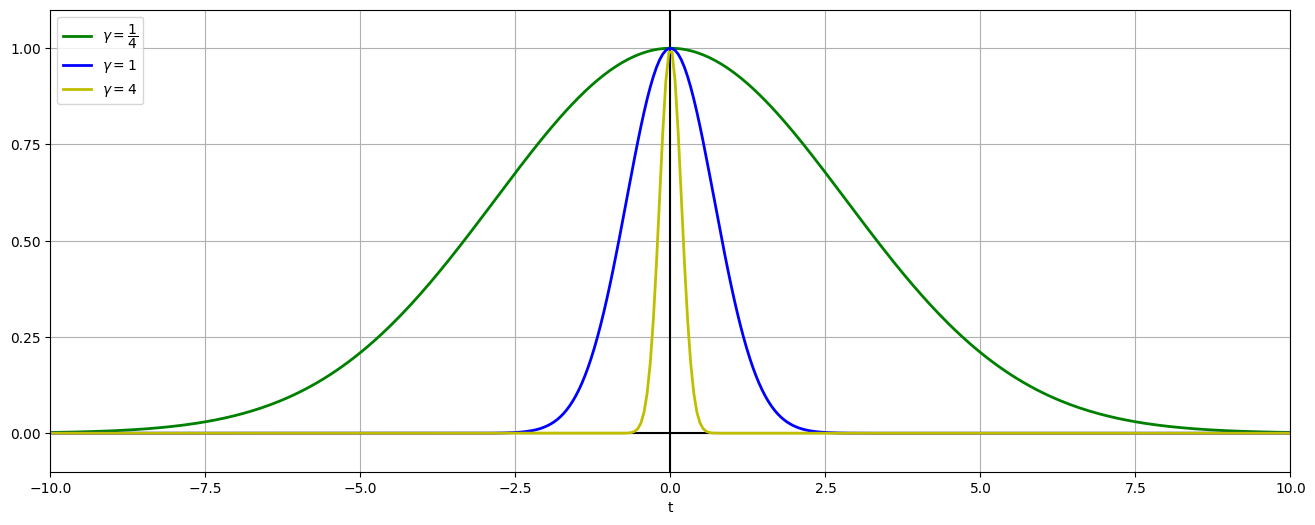

In [4]:
lim = 10
t = np.linspace(-lim, lim, 400)
gauss12 = np.exp(-(t/4)**2)
gauss = np.exp(-t**2)
gauss2 = np.exp(-(t*4)**2)

plt.figure(figsize=(16, 6))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, gauss12, "g-", linewidth=2, label=r"$\gamma = \dfrac{1}{4}$")
plt.plot(t, gauss, "b-", linewidth=2, label=r"$\gamma = 1$")
plt.plot(t, gauss2, "y-", linewidth=2, label=r"$\gamma = 4$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()